// 这是一个有向图
digraph {
	A [label="作者"]
	B [label="医生"]
	C [label="律师<SUP></SUP>"]
	A -> B
	A -> C
	B -> C
}



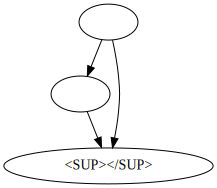

In [2]:
from graphviz import Digraph

def draw_graph():
    dot = Digraph(comment='这是一个有向图')
    dot.node('A', '作者')
    dot.node('B', '医生')
    dot.node('C', '律师<SUP></SUP>')

    dot.edges(['AB', 'AC'])
    dot.edge('B', 'C')
    print(dot.source)
    return dot


draw_graph()

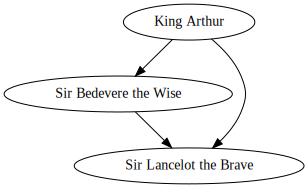

In [25]:
dot = Digraph(comment='The Round Table')

dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='true')

dot

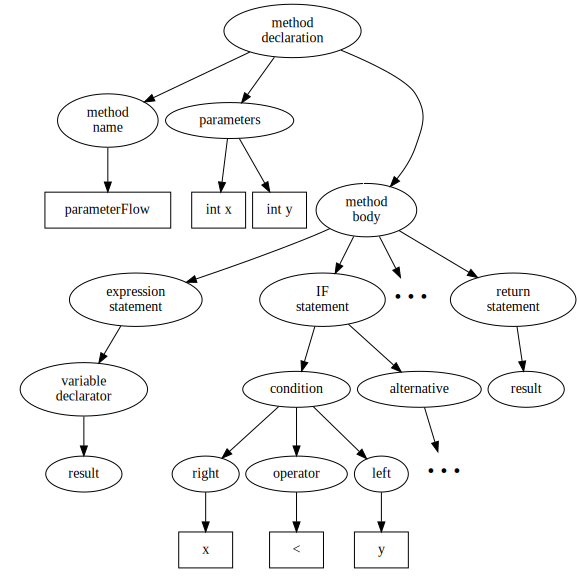

// 这是一个有向图
digraph {
	nodesep=0.1
	"level 0" [label="method
declaration"]
	"level 0" -> "level 1-1"
	"level 0" -> "level 1-2"
	"level 0" -> invisible1 [color=white]
	"level 0" -> "level 1-3"
	invisible0 [style=invisible]
	invisible1 [style=invisible]
	invisible1 -> "level 1-3" [color=white]
	"level 1-1" [label="method
name"]
	"level 2-1" [label=parameterFlow shape=box]
	"level 1-1" -> "level 2-1"
	"level 1-2" [label=parameters]
	"level 2-2" [label="int x" shape=box]
	"level 2-3" [label="int y" shape=box]
	"level 1-2" -> "level 2-2"
	"level 1-2" -> "level 2-3"
	"level 1-3" [label="method
body"]
	"level 3-1" [label="expression
statement"]
	"level 3-2" [label="IF
statement"]
	"level 3-3" [label="···" fontsize=40 shape=plain]
	"level 3-4" [label="return
statement"]
	"level 1-3" -> "level 3-1" [constraint=true]
	"level 1-3" -> "level 3-2" [constraint=true]
	"level 1-3" -> "level 3-3" [constraint=true]
	"level 1-3" -> "level 3-4" [constraint=true]
	subgraph cluster_0 {
		color=white style=fi

In [6]:
from asyncio import constants
from tkinter.ttk import Style
from turtle import color, shape
from graphviz import Digraph
from IPython.display import display


def draw_AST():
    dot = Digraph(comment='这是一个有向图')

    dot.attr(nodesep="0.1")

    dot.node("level 0", "method\ndeclaration")
    dot.edge("level 0", "level 1-1")
    # dot.edge("level 0", "invisible0", color="white")
    dot.edge("level 0", "level 1-2")
    dot.edge("level 0", "invisible1", color="white")
    dot.edge("level 0", "level 1-3")


    dot.node("invisible0", style="invisible")
    dot.node("invisible1", style="invisible")

    
    dot.edge("invisible1", "level 1-3", color="white")

    dot.node("level 1-1", "method\nname")
    dot.node("level 2-1", "parameterFlow", shape="box")
    dot.edge("level 1-1", "level 2-1")
    

    dot.node("level 1-2", "parameters")
    dot.node("level 2-2", "int x", shape="box")
    dot.node("level 2-3", "int y", shape="box")
    dot.edge("level 1-2", "level 2-2")
    dot.edge("level 1-2", "level 2-3")

    

    dot.node("level 1-3", "method\nbody")
    dot.node("level 3-1", "expression\nstatement")
    dot.node("level 3-2", "IF\nstatement")
    dot.node("level 3-3", "···", fontsize="40", shape="plain")
    dot.node("level 3-4", "return\nstatement")

    dot.edge("level 1-3", "level 3-1", constraint='true')
    dot.edge("level 1-3", "level 3-2", constraint='true')
    dot.edge("level 1-3", "level 3-3", constraint='true')
    dot.edge("level 1-3", "level 3-4", constraint='true')

    with dot.subgraph(name='cluster_0') as c:
        c.attr(style='filled', color='white')
        # c.node_attr.update(style='filled', color='white')
        c.edge("variable\ndeclarator", "result")
        # c.attr(label='process #1')

    with dot.subgraph(name='cluster_2') as c2:
        c2.attr(style='filled', color='white')
        # c2.node_attr.update(style='filled', color='white')
        dot.edges([("condition", "left"), ("condition", "operator"), ("condition", "right")])
        c2.node_attr.update(shape='box')
        c2.edges([("left", "y"), ("operator", "<"), ("right", "x")])
        # c2.attr(label='process #2')
        c2 = c2.unflatten(stagger=10)

    # dot.node("ignore1", "···", fontsize="40", shape="plain")
    dot.node("ignore2", "···", fontsize="40", shape="plain")
    dot.edges([("alternative", "ignore2")])
    dot.edges([("level 3-2", "alternative")])

    dot.node("final", "result")


    dot.edges([('level 3-1', "variable\ndeclarator")])
    dot.edges([('level 3-2', "condition")])
    dot.edges([('level 3-4', "final")])

    # dot = dot.unflatten(5)

    return dot
dot = draw_AST()
display(dot)
print(dot.source)